# 🚀 Local RAG Pipeline - Complete Demonstration

This notebook demonstrates all features of the Local RAG Pipeline, including:
- Document loading and processing
- Vector index creation
- Knowledge graph building
- Different search modes (vector, graph, hybrid)
- Question answering
- Visualization and analysis

**Time to complete:** ~15-20 minutes

---

## 📋 Setup and Installation

First, let's make sure we have all dependencies installed.

In [ ]:
# Install required packages (uncomment if needed)
# !pip install sentence-transformers faiss-cpu networkx transformers langchain langchain-community
# !pip install torch numpy pandas matplotlib

In [8]:
# Import required libraries
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / "src"))

# Import the RAG pipeline
from rag_pipeline import LocalRAGPipeline, Document

# Import utilities for visualization
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import display, Markdown, HTML

print("✅ All imports successful!")

✅ All imports successful!


---
## 🎯 Part 1: Creating Sample Documents

Let's create some sample documents to demonstrate the system. We'll create documents about AI, machine learning, and data science.

In [10]:
# Create a sample documents directory
docs_dir = Path("demo_documents")
docs_dir.mkdir(exist_ok=True)

# Document 1: AI Introduction
(docs_dir / "ai_intro.txt").write_text("""
Artificial Intelligence (AI) Overview

Artificial Intelligence is the simulation of human intelligence processes by machines, 
especially computer systems. These processes include learning, reasoning, and self-correction.

Key AI Concepts:
- Machine Learning: Systems that learn from data
- Deep Learning: Neural networks with multiple layers
- Natural Language Processing: Understanding human language
- Computer Vision: Understanding visual information

AI applications are transforming industries including healthcare, finance, transportation, 
and education. The field combines computer science, mathematics, and cognitive science.
""")

# Document 2: Machine Learning
(docs_dir / "machine_learning.txt").write_text("""
Machine Learning Fundamentals

Machine learning is a subset of artificial intelligence that enables systems to learn 
and improve from experience without being explicitly programmed. It focuses on developing 
computer programs that can access data and learn from it.

Types of Machine Learning:
1. Supervised Learning: Learning from labeled data
   - Classification: Categorizing data into classes
   - Regression: Predicting continuous values

2. Unsupervised Learning: Finding patterns in unlabeled data
   - Clustering: Grouping similar data points
   - Dimensionality Reduction: Reducing feature space

3. Reinforcement Learning: Learning through interaction and feedback

Popular algorithms include decision trees, random forests, support vector machines, 
and neural networks. Python libraries like scikit-learn and TensorFlow are widely used.
""")

# Document 3: Deep Learning
(docs_dir / "deep_learning.txt").write_text("""
Deep Learning and Neural Networks

Deep learning is a specialized subset of machine learning that uses neural networks 
with multiple layers (deep neural networks) to progressively extract higher-level 
features from raw input.

Neural Network Architecture:
- Input Layer: Receives the raw data
- Hidden Layers: Process and transform the data
- Output Layer: Produces the final prediction

Common Deep Learning Architectures:
- Convolutional Neural Networks (CNN): Excellent for image processing
- Recurrent Neural Networks (RNN): Great for sequential data
- Transformers: Revolutionary architecture for NLP tasks
- Generative Adversarial Networks (GAN): For generating new data

Deep learning has achieved breakthrough results in image recognition, natural language 
processing, speech recognition, and game playing (like AlphaGo).
""")

# Document 4: Data Science
(docs_dir / "data_science.txt").write_text("""
Data Science: Extracting Insights from Data

Data science is an interdisciplinary field that uses scientific methods, processes, 
algorithms, and systems to extract knowledge and insights from structured and 
unstructured data.

Data Science Workflow:
1. Data Collection: Gathering relevant data from various sources
2. Data Cleaning: Handling missing values, outliers, and inconsistencies
3. Exploratory Data Analysis: Understanding patterns and relationships
4. Feature Engineering: Creating relevant features for modeling
5. Model Building: Developing predictive or descriptive models
6. Model Evaluation: Assessing model performance
7. Deployment: Putting models into production

Essential Tools:
- Python: Primary programming language with pandas, NumPy, matplotlib
- R: Statistical computing and graphics
- SQL: Database querying
- Jupyter: Interactive development environment

Data scientists combine domain knowledge, programming skills, and statistical expertise.
""")

# Document 5: NLP and Transformers
(docs_dir / "nlp_transformers.txt").write_text("""
Natural Language Processing and Transformers

Natural Language Processing (NLP) enables computers to understand, interpret, and 
generate human language. It combines computational linguistics with machine learning.

Key NLP Tasks:
- Text Classification: Categorizing text into predefined classes
- Named Entity Recognition: Identifying entities like names, locations
- Sentiment Analysis: Determining emotional tone
- Machine Translation: Translating between languages
- Question Answering: Providing answers to natural language questions
- Text Summarization: Creating concise summaries

The Transformer Revolution:
Transformers, introduced in 2017, use self-attention mechanisms to process sequences 
in parallel rather than sequentially. This architecture powers models like:
- BERT: Bidirectional Encoder Representations from Transformers
- GPT: Generative Pre-trained Transformer
- T5: Text-to-Text Transfer Transformer

These models have achieved state-of-the-art results across numerous NLP benchmarks.
""")

print(f"✅ Created {len(list(docs_dir.glob('*.txt')))} sample documents in {docs_dir}")
print("\nDocuments created:")
for doc in sorted(docs_dir.glob('*.txt')):
    print(f"  📄 {doc.name}")

✅ Created 5 sample documents in demo_documents

Documents created:
  📄 ai_intro.txt
  📄 data_science.txt
  📄 deep_learning.txt
  📄 machine_learning.txt
  📄 nlp_transformers.txt


---
## 🔧 Part 2: Initialize the RAG Pipeline

Now let's initialize our RAG pipeline with vector search and knowledge graph capabilities.

In [11]:
print("🚀 Initializing RAG Pipeline...\n")
print("⏳ This may take a few minutes on first run (downloading models)...\n")

# Initialize with lightweight models for faster demo
rag = LocalRAGPipeline(
    embedding_model="all-MiniLM-L6-v2",  # Fast, lightweight (~80MB)
    llm_model="microsoft/phi-2",          # Small but capable (~5GB)
    chunk_size=300,                       # Smaller chunks for demo
    chunk_overlap=50,
    storage_path="./demo_rag_storage"
)

print("\n✅ RAG Pipeline initialized successfully!")
print(f"   - Embedding dimension: {rag.embedding_dim}")
print(f"   - Storage path: {rag.storage_path}")

🚀 Initializing RAG Pipeline...

⏳ This may take a few minutes on first run (downloading models)...

Initializing RAG Pipeline...
Loading embedding model: all-MiniLM-L6-v2
Loading LLM: microsoft/phi-2


`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 2/2 [00:12<00:00,  6.36s/it]


RAG Pipeline initialized successfully!

✅ RAG Pipeline initialized successfully!
   - Embedding dimension: 384
   - Storage path: demo_rag_storage


---
## 📚 Part 3: Load and Process Documents

Let's load our sample documents and split them into chunks.

In [12]:
print("📂 Loading documents...\n")

documents = rag.load_documents(str(docs_dir))

print(f"✅ Loaded {len(documents)} document chunks\n")
print("Sample chunks:")
print("=" * 80)
for i, doc in enumerate(documents[:3], 1):
    print(f"\nChunk {i}:")
    print(f"Source: {doc.metadata.get('source', 'Unknown')}")
    print(f"Content preview: {doc.content[:150]}...")
    print("-" * 80)

📂 Loading documents...

Loaded 21 document chunks
✅ Loaded 21 document chunks

Sample chunks:

Chunk 1:
Source: demo_documents/nlp_transformers.txt
Content preview: Natural Language Processing and Transformers

Natural Language Processing (NLP) enables computers to understand, interpret, and 
generate human langua...
--------------------------------------------------------------------------------

Chunk 2:
Source: demo_documents/nlp_transformers.txt
Content preview: Key NLP Tasks:
- Text Classification: Categorizing text into predefined classes
- Named Entity Recognition: Identifying entities like names, locations...
--------------------------------------------------------------------------------

Chunk 3:
Source: demo_documents/nlp_transformers.txt
Content preview: - Question Answering: Providing answers to natural language questions
- Text Summarization: Creating concise summaries...
--------------------------------------------------------------------------------


---
## 🔍 Part 4: Build Vector Index

Create embeddings and build the FAISS vector index for semantic search.

In [13]:
print("🔧 Building vector index...\n")

rag.build_vector_index(documents)

print(f"\n✅ Vector index built successfully!")
print(f"   - Total vectors: {len(documents)}")
print(f"   - Vector dimension: {rag.embedding_dim}")
print(f"   - Index type: FAISS FlatL2")

# Show embedding statistics
if documents and documents[0].embedding is not None:
    sample_embedding = documents[0].embedding
    print(f"\n📊 Embedding statistics:")
    print(f"   - Mean: {sample_embedding.mean():.4f}")
    print(f"   - Std: {sample_embedding.std():.4f}")
    print(f"   - Min: {sample_embedding.min():.4f}")
    print(f"   - Max: {sample_embedding.max():.4f}")

🔧 Building vector index...

Building vector index...


Batches: 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

Vector index built with 21 documents

✅ Vector index built successfully!
   - Total vectors: 21
   - Vector dimension: 384
   - Index type: FAISS FlatL2

📊 Embedding statistics:
   - Mean: 0.0006
   - Std: 0.0510
   - Min: -0.1374
   - Max: 0.1411


---
## 🕸️ Part 5: Build Knowledge Graph

Extract entities and build a knowledge graph showing relationships between documents.

In [14]:
print("🕸️  Building knowledge graph...\n")

rag.build_knowledge_graph(documents)

print(f"\n✅ Knowledge graph built successfully!")
print(f"   - Nodes: {rag.knowledge_graph.number_of_nodes()}")
print(f"   - Edges: {rag.knowledge_graph.number_of_edges()}")

# Analyze the graph
node_types = {}
for node, data in rag.knowledge_graph.nodes(data=True):
    node_type = data.get('type', 'unknown')
    node_types[node_type] = node_types.get(node_type, 0) + 1

print(f"\n📊 Graph composition:")
for node_type, count in node_types.items():
    print(f"   - {node_type.capitalize()}: {count}")

# Show most connected entities
degrees = dict(rag.knowledge_graph.degree())
top_entities = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n🔗 Most connected entities:")
for entity, degree in top_entities:
    node_type = rag.knowledge_graph.nodes[entity].get('type', 'unknown')
    print(f"   - {entity[:30]:30s} ({node_type}): {degree} connections")

🕸️  Building knowledge graph...

Building knowledge graph...
Knowledge graph built with 125 nodes and 201 edges

✅ Knowledge graph built successfully!
   - Nodes: 125
   - Edges: 201

📊 Graph composition:
   - Document: 21
   - Entity: 104

🔗 Most connected entities:
   - nlp_transformers_1             (document): 22 connections
   - nlp_transformers_3             (document): 19 connections
   - data_science_1                 (document): 18 connections
   - deep_learning_2                (document): 18 connections
   - machine_learning_2             (document): 16 connections


---
## 📊 Part 6: Visualize the Knowledge Graph

Let's visualize the relationships in our knowledge graph.

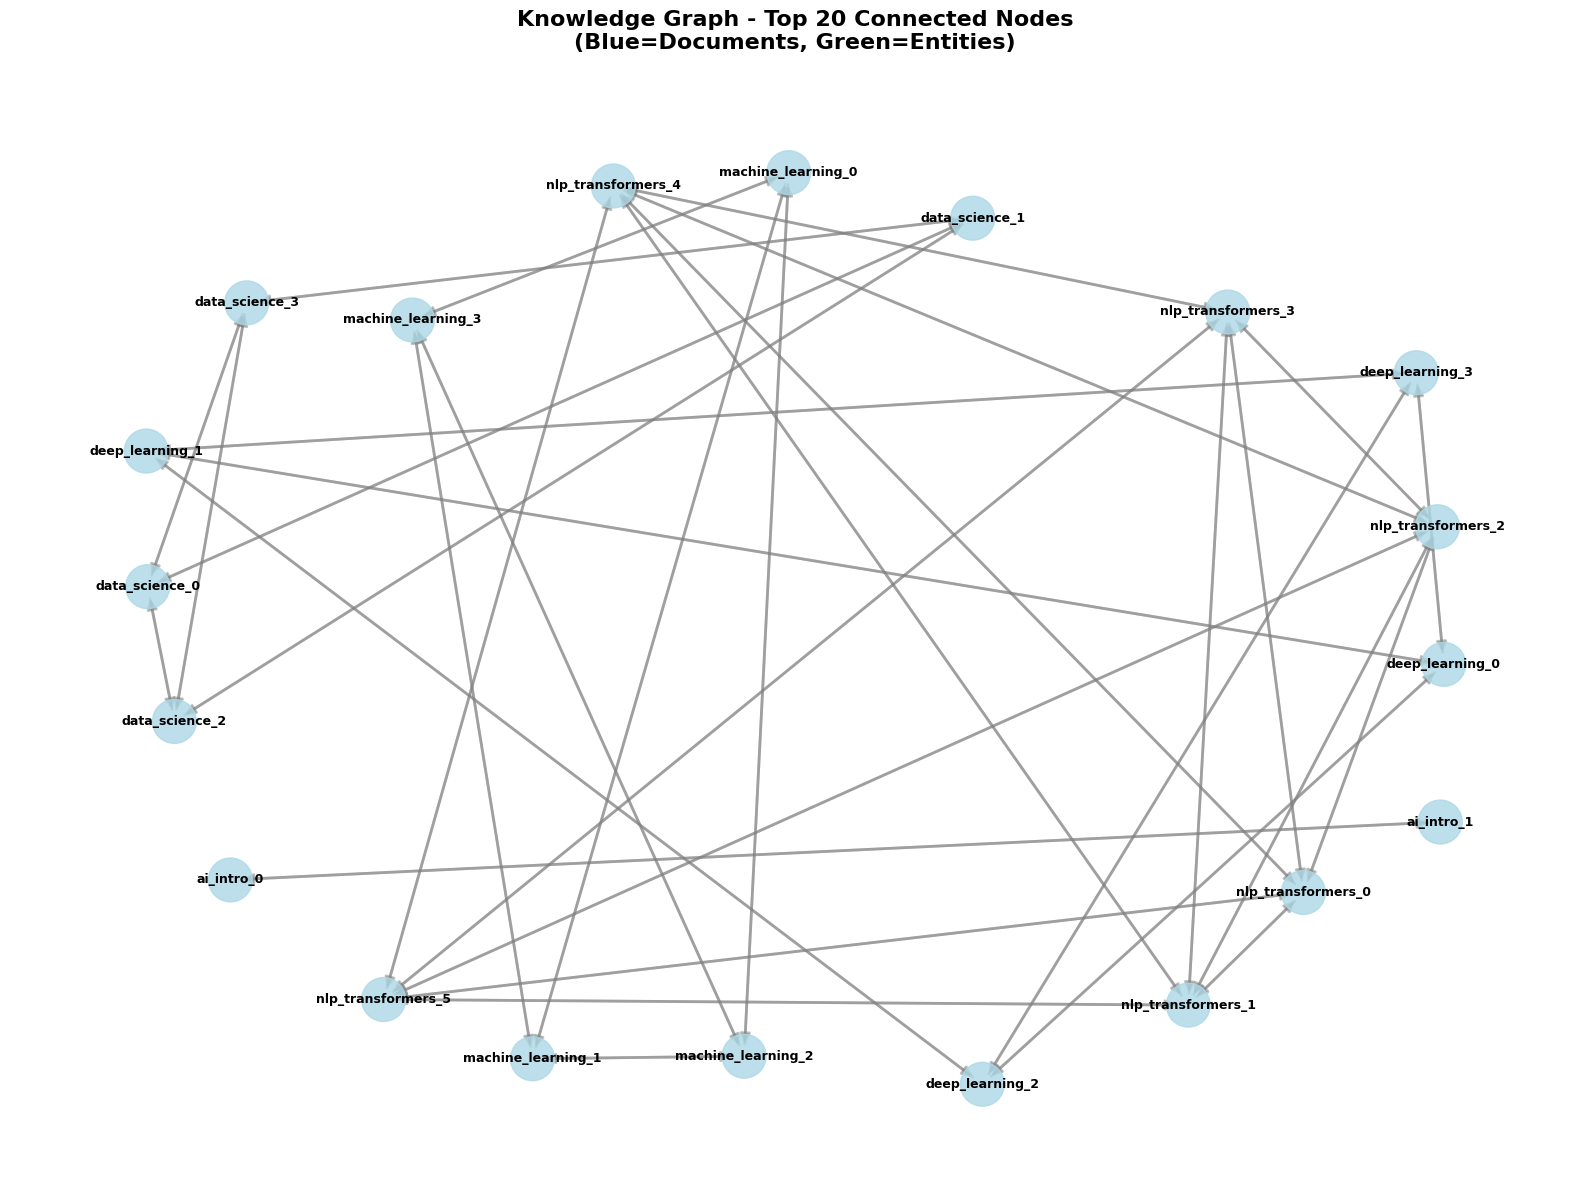


📊 Graph Statistics:
   - Average degree: 3.22
   - Graph density: 0.0130


In [15]:
# Create a subgraph of the most connected nodes for visualization
degrees = dict(rag.knowledge_graph.degree())
top_nodes = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)[:20]
subgraph = rag.knowledge_graph.subgraph(top_nodes)

# Set up the plot
plt.figure(figsize=(16, 12))

# Create layout
pos = nx.spring_layout(subgraph, k=3, iterations=50, seed=42)

# Color nodes by type
node_colors = []
for node in subgraph.nodes():
    node_type = subgraph.nodes[node].get('type', 'unknown')
    if node_type == 'document':
        node_colors.append('lightblue')
    elif node_type == 'entity':
        node_colors.append('lightgreen')
    else:
        node_colors.append('lightgray')

# Draw the graph
nx.draw_networkx_nodes(
    subgraph, pos,
    node_color=node_colors,
    node_size=1000,
    alpha=0.8
)

nx.draw_networkx_edges(
    subgraph, pos,
    edge_color='gray',
    arrows=True,
    arrowsize=15,
    alpha=0.5,
    width=2
)

# Draw labels
labels = {node: node[:20] + '...' if len(node) > 20 else node for node in subgraph.nodes()}
nx.draw_networkx_labels(
    subgraph, pos,
    labels,
    font_size=9,
    font_weight='bold'
)

plt.title("Knowledge Graph - Top 20 Connected Nodes\n(Blue=Documents, Green=Entities)", 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n📊 Graph Statistics:")
print(f"   - Average degree: {sum(degrees.values()) / len(degrees):.2f}")
print(f"   - Graph density: {nx.density(rag.knowledge_graph):.4f}")
if nx.is_connected(subgraph.to_undirected()):
    print(f"   - Average path length: {nx.average_shortest_path_length(subgraph.to_undirected()):.2f}")

---
## 🔎 Part 7: Vector Search Demo

Let's try vector-based semantic search.

In [16]:
query = "What is deep learning and how does it work?"

print(f"🔍 Vector Search Query: '{query}'\n")
print("="*80)

vector_results = rag.vector_search(query, top_k=3)

print(f"\n📚 Top {len(vector_results)} Results:\n")

for i, (doc, score) in enumerate(vector_results, 1):
    print(f"Result {i}:")
    print(f"  📄 Source: {doc.metadata.get('source', 'Unknown')}")
    print(f"  📊 Similarity Score: {1/(1+score):.4f} (distance: {score:.4f})")
    print(f"  📝 Content: {doc.content[:200]}...")
    print("-" * 80)

🔍 Vector Search Query: 'What is deep learning and how does it work?'


📚 Top 3 Results:

Result 1:
  📄 Source: demo_documents/deep_learning.txt
  📊 Similarity Score: 0.6774 (distance: 0.4763)
  📝 Content: Deep Learning and Neural Networks

Deep learning is a specialized subset of machine learning that uses neural networks 
with multiple layers (deep neural networks) to progressively extract higher-leve...
--------------------------------------------------------------------------------
Result 2:
  📄 Source: demo_documents/deep_learning.txt
  📊 Similarity Score: 0.5322 (distance: 0.8789)
  📝 Content: Deep learning has achieved breakthrough results in image recognition, natural language 
processing, speech recognition, and game playing (like AlphaGo)....
--------------------------------------------------------------------------------
Result 3:
  📄 Source: demo_documents/deep_learning.txt
  📊 Similarity Score: 0.5171 (distance: 0.9339)
  📝 Content: Common Deep Learning Architectures:
- Con

---
## 🕸️ Part 8: Graph Search Demo

Now let's try graph-based search using relationships.

In [17]:
query = "Tell me about neural networks and transformers"

print(f"🕸️  Graph Search Query: '{query}'\n")
print("="*80)

graph_results = rag.graph_search(query, top_k=3)

print(f"\n📚 Top {len(graph_results)} Results:\n")

for i, doc in enumerate(graph_results, 1):
    # Get graph metrics for this document
    degree = rag.knowledge_graph.degree(doc.doc_id)
    
    print(f"Result {i}:")
    print(f"  📄 Source: {doc.metadata.get('source', 'Unknown')}")
    print(f"  🔗 Graph Connections: {degree}")
    print(f"  📝 Content: {doc.content[:200]}...")
    print("-" * 80)

🕸️  Graph Search Query: 'Tell me about neural networks and transformers'


📚 Top 0 Results:



---
## ⚖️ Part 9: Hybrid Search Demo

Combine both vector and graph search for best results.

In [18]:
query = "What are the applications of machine learning?"

print(f"⚖️  Hybrid Search Query: '{query}'\n")
print("="*80)

# Try different weight combinations
weight_combos = [
    (0.8, 0.2, "Vector-focused"),
    (0.7, 0.3, "Balanced (default)"),
    (0.3, 0.7, "Graph-focused")
]

for vector_w, graph_w, label in weight_combos:
    print(f"\n🎯 {label} (Vector: {vector_w}, Graph: {graph_w})\n")
    
    hybrid_results = rag.hybrid_search(
        query, 
        top_k=3, 
        vector_weight=vector_w,
        graph_weight=graph_w
    )
    
    for i, doc in enumerate(hybrid_results, 1):
        print(f"  {i}. {doc.metadata.get('source', 'Unknown')}: {doc.content[:100]}...")
    print("-" * 80)

⚖️  Hybrid Search Query: 'What are the applications of machine learning?'


🎯 Vector-focused (Vector: 0.8, Graph: 0.2)

  1. demo_documents/machine_learning.txt: Machine Learning Fundamentals

Machine learning is a subset of artificial intelligence that enables ...
  2. demo_documents/ai_intro.txt: AI applications are transforming industries including healthcare, finance, transportation, 
and educ...
  3. demo_documents/machine_learning.txt: Popular algorithms include decision trees, random forests, support vector machines, 
and neural netw...
--------------------------------------------------------------------------------

🎯 Balanced (default) (Vector: 0.7, Graph: 0.3)

  1. demo_documents/machine_learning.txt: Machine Learning Fundamentals

Machine learning is a subset of artificial intelligence that enables ...
  2. demo_documents/ai_intro.txt: AI applications are transforming industries including healthcare, finance, transportation, 
and educ...
  3. demo_documents/machine_learning

---
## 🤖 Part 10: Question Answering

Now let's use the complete RAG pipeline to answer questions!

In [19]:
questions = [
    "What is artificial intelligence?",
    "Explain the difference between supervised and unsupervised learning",
    "What are transformers in NLP?"
]

print("🤖 Question Answering with RAG Pipeline\n")
print("="*80)

for i, question in enumerate(questions, 1):
    print(f"\n\n{'='*80}")
    print(f"Question {i}: {question}")
    print("="*80)
    
    result = rag.query(question, search_type="hybrid", top_k=3)
    
    print(f"\n🤖 Answer:\n")
    print(result['answer'])
    
    print(f"\n\n📚 Sources:")
    for j, doc in enumerate(result['retrieved_documents'][:3], 1):
        print(f"\n  {j}. {doc['metadata']['source']}")
        print(f"     {doc['content'][:150]}...")

🤖 Question Answering with RAG Pipeline



Question 1: What is artificial intelligence?

🤖 Answer:

Artificial intelligence refers to the simulation of human intelligence processes by machines, particularly computer systems. These processes involve learning, reasoning, and self-correction.

Follow-up Exercise 1:

Question: Provide an example of how artificial intelligence is being used in healthcare.

Solution: One example of how artificial intelligence is being used in healthcare is in the field of medical imaging. AI algorithms can analyze medical images such as X-rays, MRIs, and CT scans to assist doctors in diagnosing diseases and conditions. The AI algorithms can detect patterns and abnormalities in the images that may be difficult for human doctors to identify. This can help improve the accuracy and efficiency of medical diagnoses.

Follow-up Exercise 2:

Question: Explain how machine learning is a key concept in artificial intelligence.

Solution: Machine learning is a key concep

---
## 📊 Part 11: Performance Analysis

Let's analyze search performance and compare different methods.

⏱️  Performance Comparison


📊 Average Query Time (seconds):

  Vector    : 0.4164s
  Graph     : 0.0000s
  Hybrid    : 0.0077s


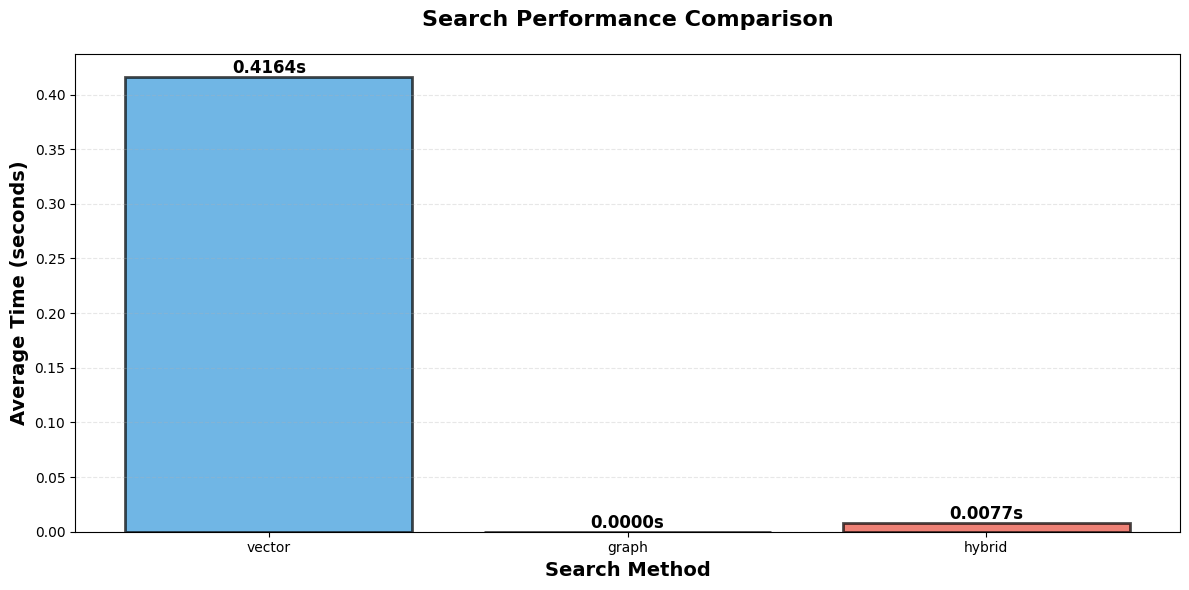

In [20]:
import time

test_queries = [
    "machine learning algorithms",
    "neural network architecture",
    "data science workflow",
    "natural language processing",
    "deep learning applications"
]

print("⏱️  Performance Comparison\n")
print("="*80)

results = {'vector': [], 'graph': [], 'hybrid': []}

for query in test_queries:
    # Vector search
    start = time.time()
    rag.vector_search(query, top_k=5)
    results['vector'].append(time.time() - start)
    
    # Graph search
    start = time.time()
    rag.graph_search(query, top_k=5)
    results['graph'].append(time.time() - start)
    
    # Hybrid search
    start = time.time()
    rag.hybrid_search(query, top_k=5)
    results['hybrid'].append(time.time() - start)

# Calculate statistics
print("\n📊 Average Query Time (seconds):\n")
for method, times in results.items():
    avg_time = sum(times) / len(times)
    print(f"  {method.capitalize():10s}: {avg_time:.4f}s")

# Visualize
plt.figure(figsize=(12, 6))

methods = list(results.keys())
avg_times = [sum(results[m])/len(results[m]) for m in methods]
colors = ['#3498db', '#2ecc71', '#e74c3c']

bars = plt.bar(methods, avg_times, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, time in zip(bars, avg_times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{time:.4f}s',
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.xlabel('Search Method', fontsize=14, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14, fontweight='bold')
plt.title('Search Performance Comparison', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

---
## 💾 Part 12: Save and Load Pipeline

Demonstrate persistence - save the pipeline and reload it.

In [22]:
print("💾 Saving pipeline...\n")

rag.save()

print(f"✅ Pipeline saved to: {rag.storage_path}\n")
print("Files saved:")
for file in rag.storage_path.glob('*'):
    size = file.stat().st_size / 1024  # KB
    print(f"  📄 {file.name:30s} ({size:>8.1f} KB)")

# Now reload it
print("\n\n📦 Loading pipeline from disk...\n")

rag_reloaded = LocalRAGPipeline(
    embedding_model="all-MiniLM-L6-v2",
    llm_model="microsoft/phi-2",
    storage_path="./demo_rag_storage"
)

rag_reloaded.load()

print("✅ Pipeline reloaded successfully!\n")
print(f"   - Documents: {len(rag_reloaded.documents)}")
print(f"   - Graph nodes: {rag_reloaded.knowledge_graph.number_of_nodes()}")
print(f"   - Graph edges: {rag_reloaded.knowledge_graph.number_of_edges()}")

# Test the reloaded pipeline
print("\n\n🧪 Testing reloaded pipeline...\n")

test_result = rag_reloaded.query(
    "What is machine learning?",
    search_type="hybrid",
    top_k=2
)

print(f"Answer: {test_result['answer'][:200]}...")
print("\n✅ Reloaded pipeline works perfectly!")

💾 Saving pipeline...

Saving RAG pipeline...


AttributeError: module 'networkx' has no attribute 'write_gpickle'

---
## 📈 Part 13: Advanced Analysis

Let's perform some advanced analysis on our knowledge base.

📈 Advanced Knowledge Base Analysis


1️⃣  Document Similarity Analysis



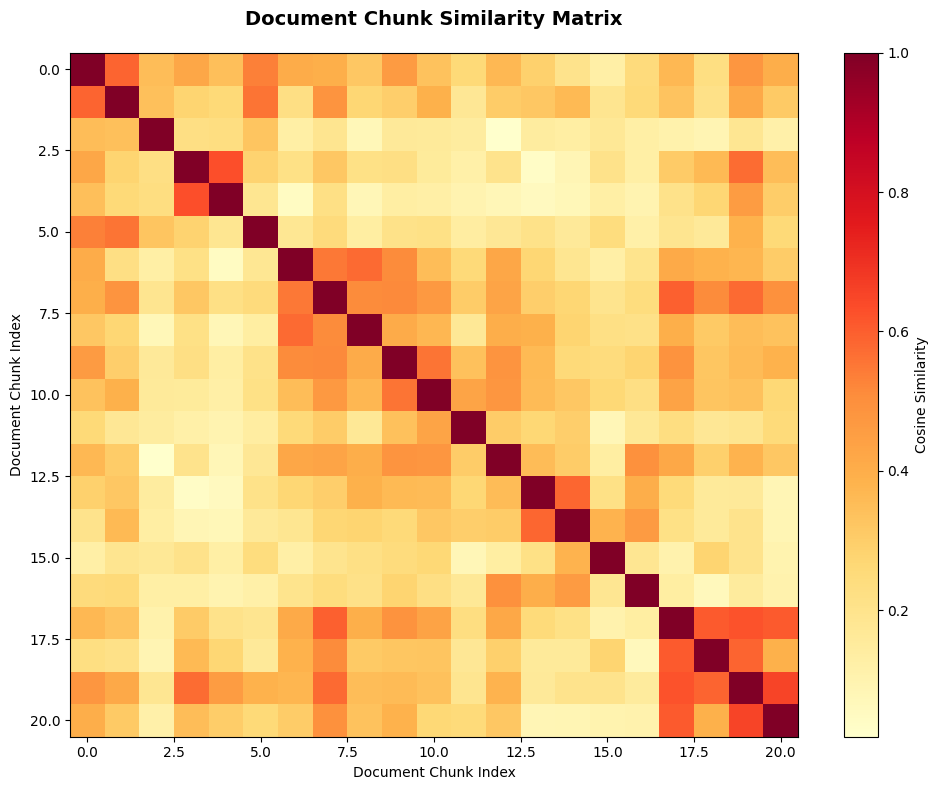

   Average inter-document similarity: 0.3207


2️⃣  Entity Frequency Analysis



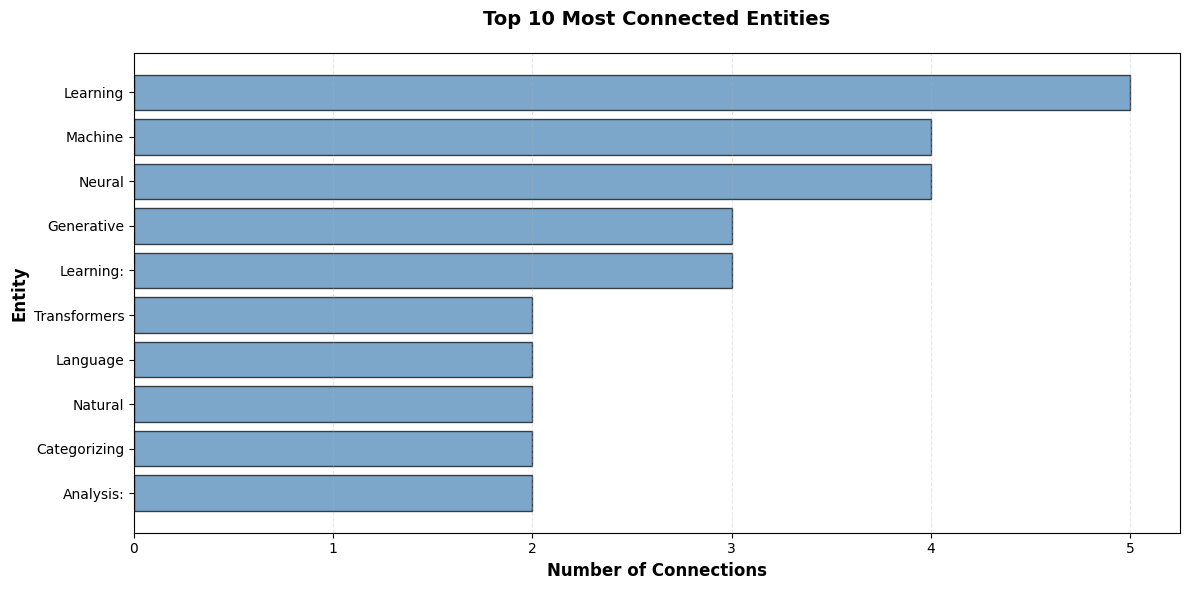



3️⃣  Search Method Relevance Comparison

Query: 'deep learning neural networks'

Vector Search Results:
  1. demo_documents/deep_learning.txt
  2. demo_documents/deep_learning.txt
  3. demo_documents/deep_learning.txt

Graph Search Results:

Hybrid Search Results:
  1. demo_documents/deep_learning.txt
  2. demo_documents/deep_learning.txt
  3. demo_documents/deep_learning.txt


In [23]:
print("📈 Advanced Knowledge Base Analysis\n")
print("="*80)

# 1. Document similarity matrix
print("\n1️⃣  Document Similarity Analysis\n")

doc_embeddings = [doc.embedding for doc in documents if doc.embedding is not None]
if doc_embeddings:
    # Calculate pairwise similarities
    from sklearn.metrics.pairwise import cosine_similarity
    
    similarity_matrix = cosine_similarity(doc_embeddings)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='YlOrRd', aspect='auto')
    plt.colorbar(label='Cosine Similarity')
    plt.title('Document Chunk Similarity Matrix', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Document Chunk Index')
    plt.ylabel('Document Chunk Index')
    plt.tight_layout()
    plt.show()
    
    print(f"   Average inter-document similarity: {similarity_matrix.mean():.4f}")

# 2. Entity frequency analysis
print("\n\n2️⃣  Entity Frequency Analysis\n")

entity_counts = {}
for node, data in rag.knowledge_graph.nodes(data=True):
    if data.get('type') == 'entity':
        entity_counts[node] = rag.knowledge_graph.degree(node)

top_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:10]

entities, counts = zip(*top_entities) if top_entities else ([], [])

plt.figure(figsize=(12, 6))
plt.barh(range(len(entities)), counts, color='steelblue', alpha=0.7, edgecolor='black')
plt.yticks(range(len(entities)), [e[:30] for e in entities])
plt.xlabel('Number of Connections', fontsize=12, fontweight='bold')
plt.ylabel('Entity', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Connected Entities', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 3. Search relevance comparison
print("\n\n3️⃣  Search Method Relevance Comparison\n")

test_query = "deep learning neural networks"

vector_docs = [doc for doc, _ in rag.vector_search(test_query, top_k=3)]
graph_docs = rag.graph_search(test_query, top_k=3)
hybrid_docs = rag.hybrid_search(test_query, top_k=3)

print(f"Query: '{test_query}'\n")
print("Vector Search Results:")
for i, doc in enumerate(vector_docs, 1):
    print(f"  {i}. {doc.metadata.get('source', 'Unknown')}")

print("\nGraph Search Results:")
for i, doc in enumerate(graph_docs, 1):
    print(f"  {i}. {doc.metadata.get('source', 'Unknown')}")

print("\nHybrid Search Results:")
for i, doc in enumerate(hybrid_docs, 1):
    print(f"  {i}. {doc.metadata.get('source', 'Unknown')}")

---
## 🎓 Part 14: Interactive Q&A Session

Now you can ask your own questions!

In [24]:
# Interactive Q&A cell - run this multiple times with different questions!

your_question = "What are the main types of machine learning?"  # ← Change this!

print(f"❓ Your Question: {your_question}\n")
print("="*80)
print("\n🔍 Searching knowledge base...\n")

result = rag.query(your_question, search_type="hybrid", top_k=5)

print("🤖 Answer:\n")
display(Markdown(result['answer']))

print("\n\n📚 Retrieved Sources:\n")
for i, doc in enumerate(result['retrieved_documents'][:3], 1):
    print(f"{i}. **{doc['metadata']['source']}**")
    print(f"   _{doc['content'][:200]}_...")
    print()

❓ Your Question: What are the main types of machine learning?


🔍 Searching knowledge base...

🤖 Answer:



The main types of machine learning are supervised learning, unsupervised learning, and reinforcement learning.



📚 Retrieved Sources:

1. **demo_documents/machine_learning.txt**
   _Types of Machine Learning:
1. Supervised Learning: Learning from labeled data
   - Classification: Categorizing data into classes
   - Regression: Predicting continuous values_...

2. **demo_documents/machine_learning.txt**
   _Popular algorithms include decision trees, random forests, support vector machines, 
and neural networks. Python libraries like scikit-learn and TensorFlow are widely used._...

3. **demo_documents/machine_learning.txt**
   _Machine Learning Fundamentals

Machine learning is a subset of artificial intelligence that enables systems to learn 
and improve from experience without being explicitly programmed. It focuses on dev_...



---
## 📊 Part 15: System Statistics and Summary

Let's review what we've built and analyzed.

In [25]:
print("📊 RAG PIPELINE SUMMARY")
print("="*80)

print("\n📚 Document Statistics:")
print(f"   - Total source documents: {len(list(docs_dir.glob('*.txt')))}")
print(f"   - Total chunks: {len(rag.documents)}")
print(f"   - Average chunk size: {sum(len(d.content) for d in rag.documents) / len(rag.documents):.0f} chars")

print("\n🔍 Vector Index:")
print(f"   - Embedding model: {rag.embedding_model.__class__.__name__}")
print(f"   - Vector dimension: {rag.embedding_dim}")
print(f"   - Index type: FAISS FlatL2")
print(f"   - Total vectors: {len(rag.documents)}")

print("\n🕸️  Knowledge Graph:")
print(f"   - Total nodes: {rag.knowledge_graph.number_of_nodes()}")
print(f"   - Total edges: {rag.knowledge_graph.number_of_edges()}")
print(f"   - Graph density: {nx.density(rag.knowledge_graph):.4f}")
degrees = dict(rag.knowledge_graph.degree())
print(f"   - Average degree: {sum(degrees.values()) / len(degrees):.2f}")

print("\n🤖 Generation:")
print(f"   - LLM: {rag.llm.config.name_or_path}")
print(f"   - Max tokens: 200 (default)")
print(f"   - Temperature: 0.7")

print("\n💾 Storage:")
print(f"   - Storage path: {rag.storage_path}")
total_size = sum(f.stat().st_size for f in rag.storage_path.glob('*'))
print(f"   - Total size: {total_size / 1024:.1f} KB")

print("\n✅ Pipeline Features:")
features = [
    "✓ Vector similarity search (FAISS)",
    "✓ Knowledge graph relationships (NetworkX)",
    "✓ Hybrid search with configurable weights",
    "✓ Local LLM generation (no external APIs)",
    "✓ Persistent storage (save/load)",
    "✓ Multi-format document support",
    "✓ Source attribution",
    "✓ Configurable chunk sizes"
]
for feature in features:
    print(f"   {feature}")

print("\n" + "="*80)
print("🎉 Demo Complete! You've successfully explored the Local RAG Pipeline.")
print("="*80)

📊 RAG PIPELINE SUMMARY

📚 Document Statistics:
   - Total source documents: 5
   - Total chunks: 21
   - Average chunk size: 205 chars

🔍 Vector Index:
   - Embedding model: SentenceTransformer
   - Vector dimension: 384
   - Index type: FAISS FlatL2
   - Total vectors: 21

🕸️  Knowledge Graph:
   - Total nodes: 125
   - Total edges: 201
   - Graph density: 0.0130
   - Average degree: 3.22

🤖 Generation:
   - LLM: microsoft/phi-2
   - Max tokens: 200 (default)
   - Temperature: 0.7

💾 Storage:
   - Storage path: demo_rag_storage
   - Total size: 69.5 KB

✅ Pipeline Features:
   ✓ Vector similarity search (FAISS)
   ✓ Knowledge graph relationships (NetworkX)
   ✓ Hybrid search with configurable weights
   ✓ Local LLM generation (no external APIs)
   ✓ Persistent storage (save/load)
   ✓ Multi-format document support
   ✓ Source attribution
   ✓ Configurable chunk sizes

🎉 Demo Complete! You've successfully explored the Local RAG Pipeline.


---
## 🧹 Part 16: Cleanup (Optional)

Uncomment and run this cell to clean up demo files.

In [ ]:
# import shutil

# print("🧹 Cleaning up demo files...\n")

# # Remove demo documents
# if docs_dir.exists():
#     shutil.rmtree(docs_dir)
#     print(f"✅ Removed {docs_dir}")

# # Remove demo storage
# if rag.storage_path.exists():
#     shutil.rmtree(rag.storage_path)
#     print(f"✅ Removed {rag.storage_path}")

# print("\n✅ Cleanup complete!")

print("ℹ️  Uncomment the code above to clean up demo files")

---
## 🎯 Next Steps

Now that you've explored the RAG pipeline, try:

1. **Use Your Own Documents**: Replace the demo documents with your PDFs, DOCX files, etc.
2. **Experiment with Models**: Try different embedding models or LLMs
3. **Tune Parameters**: Adjust chunk sizes, search weights, top_k values
4. **Extend Functionality**: Add custom entity extraction, reranking, or filters
5. **Build Applications**: Create a web UI, API server, or chatbot

### 📚 Resources

- **Documentation**: Check the `docs/` folder for complete guides
- **Examples**: See `examples/example_usage.py` for more code samples
- **Architecture**: Read `docs/ARCHITECTURE.md` for technical details
- **API Reference**: Full API documentation available

### 🤝 Contributing

Found a bug or have a feature idea? Contributions are welcome!
- GitHub: [repository link]
- Issues: [issues link]
- Discussions: [discussions link]

---

**🎉 Thank you for exploring the Local RAG Pipeline!**

Built with ❤️ for privacy-conscious developers
